In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv("/content/deep_learning.csv")

In [4]:
df.head()

,Number of times pregnant,glucose concentration,blood pressure,Triceps thickness,insulin level,Body mass index,Diabetes pedigree function,Age,Diabetes result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isnull().sum()

Number of times pregnant      0
glucose concentration         0
blood pressure                0
Triceps thickness             0
insulin level                 0
Body mass index               0
Diabetes pedigree function    0
Age                           0
Diabetes result               0
dtype: int64

In [6]:
df.groupby("Diabetes result").size()

Diabetes result
0    500
1    268
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5451bdb3d0>,
      dtype=object)

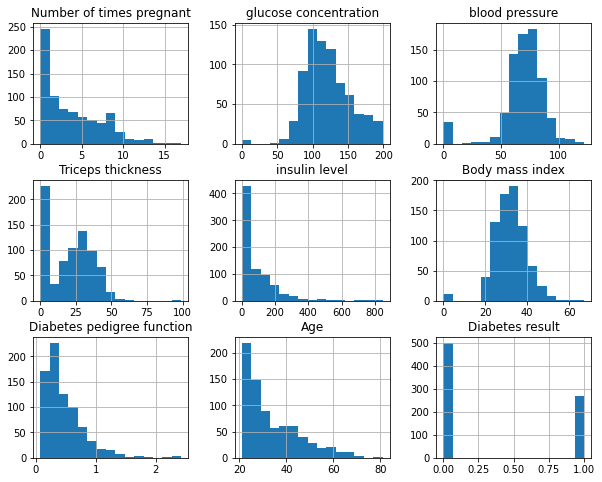

In [7]:
df.hist(figsize=(10,8),bins=15)

In [8]:
X=df.drop("Diabetes result",axis=1)

In [9]:
y=df["Diabetes result"]

In [10]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=50)

In [12]:
from keras.utils import np_utils
y_train=np_utils.to_categorical(y_train)

In [13]:
model=Sequential()
model.add(Dense(12,input_dim=8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

In [14]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
model.fit(X_train,y_train,epochs=150,batch_size=15)

Epoch 1/150
36/36 [==============================] - 1s 992us/step - loss: 11.1959 - accuracy: 0.6567
Epoch 2/150
36/36 [==============================] - 0s 1ms/step - loss: 1.7095 - accuracy: 0.5777
Epoch 3/150
36/36 [==============================] - 0s 1ms/step - loss: 1.2422 - accuracy: 0.5021
Epoch 4/150
36/36 [==============================] - 0s 998us/step - loss: 1.2270 - accuracy: 0.4967
Epoch 5/150
36/36 [==============================] - 0s 1ms/step - loss: 0.9232 - accuracy: 0.5707
Epoch 6/150
36/36 [==============================] - 0s 1ms/step - loss: 0.9952 - accuracy: 0.5826
Epoch 7/150
36/36 [==============================] - 0s 1ms/step - loss: 0.8704 - accuracy: 0.5869
Epoch 8/150
36/36 [==============================] - 0s 1ms/step - loss: 0.8789 - accuracy: 0.5786
Epoch 9/150
36/36 [==============================] - 0s 2ms/step - loss: 0.7644 - accuracy: 0.6144
Epoch 10/150
36/36 [==============================] - 0s 1ms/step - loss: 0.7515 - accuracy: 0.6070
Epoc

In [16]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)

In [17]:
accuracy_score(y_test,y_pred)

0.7359307359307359